In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('Social_Network_Ads.csv')

In [76]:
df=df.iloc[:,2:]

In [77]:
df.sample(5)
# The below is a classification problem

Age  EstimatedSalary  Purchased
282   37            70000          1
106   26            35000          0
103   33           149000          1
71    24            27000          0
157   29            75000          0

### Train test split

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

### StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to train set, it will learn that parameter
scaler.fit(X_train)         # fit means calculate mean and std dev of both cols(age and purchased)

# model learns from training data only but transformation both the datasets is needed to be done
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [81]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [82]:
np.round(X_train.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [83]:
np.round(X_train_scaled.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

### Effect of Scaling

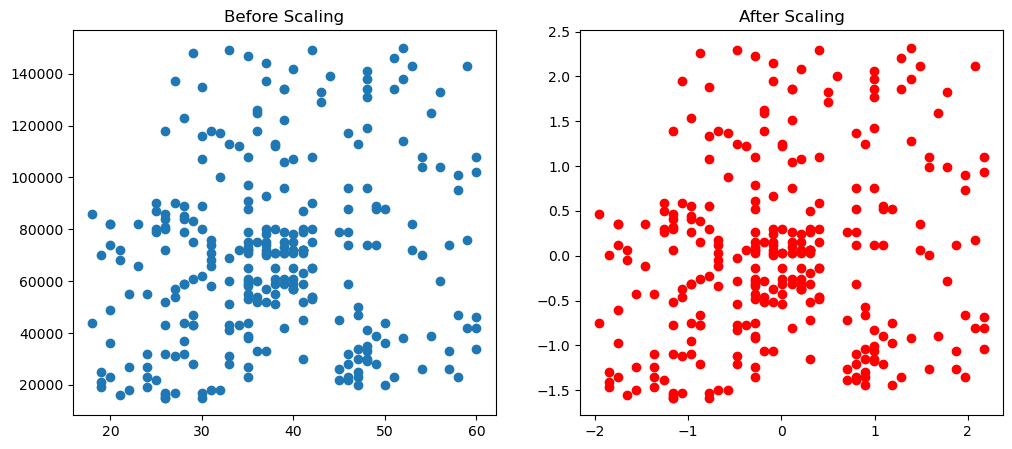

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()
# after foing the above we scaled the data abou 0(which was the sole motive to perform standardization)

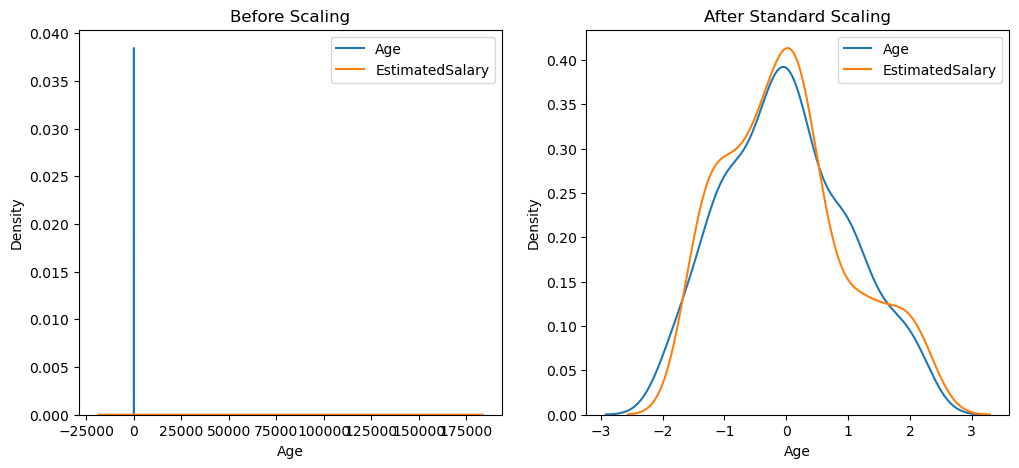

In [85]:
# to check whether the scaling had put any effect or not run the below code (we plot the pdf of both the graphs)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label='EstimatedSalary')
ax1.legend()

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2,label='EstimatedSalary')
ax2.legend()
plt.show()

### Comparison of Distributions

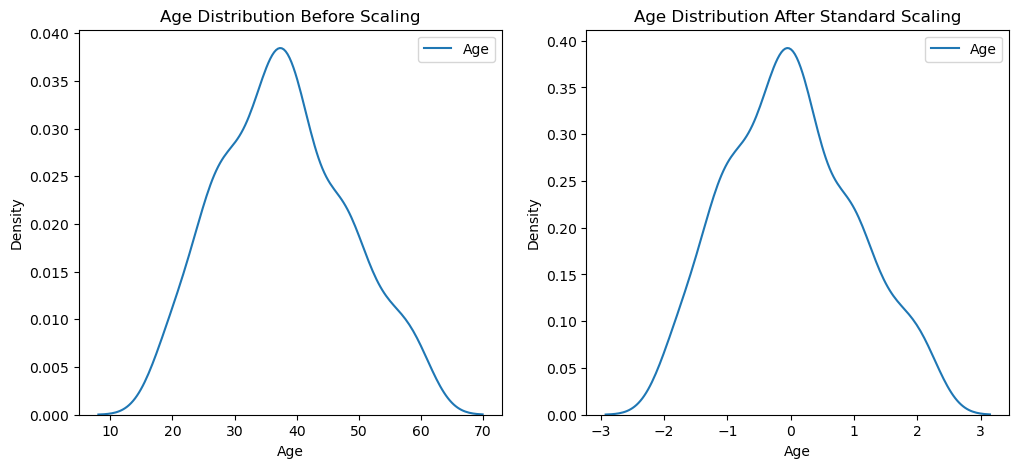

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
ax1.legend()

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,label='Age')
ax2.legend()
plt.show()

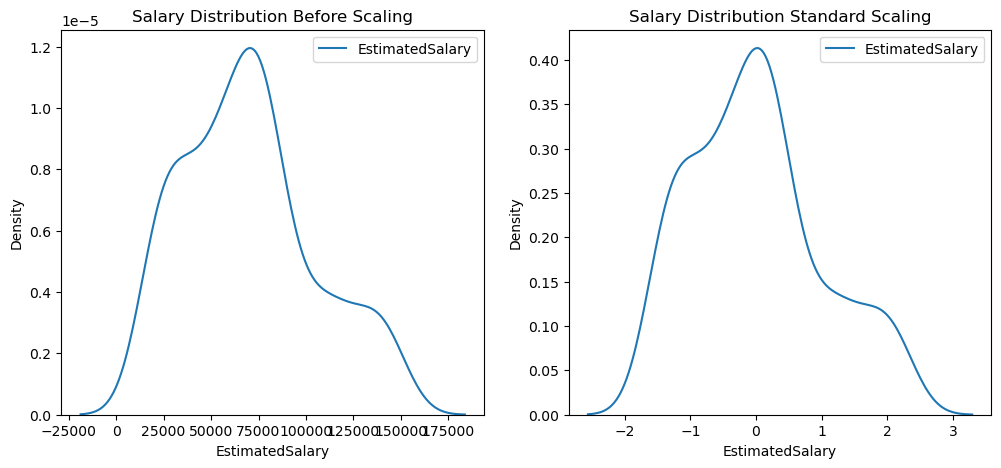

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label='EstimatedSalary')
ax1.legend()

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2,label='EstimatedSalary')
ax2.legend()
plt.show()

## Why scaling is important?

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [90]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [104]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [96]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [97]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [103]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [47]:
df.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

### Effect of Outlier

In [68]:
new_data = pd.DataFrame({'Age':[5,90,95],
                             'EstimatedSalary':[1000,250000,350000],
                             'Purchased':[0,1,1]})
df = pd.concat([df, new_data], ignore_index=True)
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510.0    Male   19            19000          0
1    15810944.0    Male   35            20000          0
2    15668575.0  Female   26            43000          0
3    15603246.0  Female   27            57000          0
4    15804002.0    Male   19            76000          0
..          ...     ...  ...              ...        ...
398  15755018.0    Male   36            33000          0
399  15594041.0  Female   49            36000          1
400         NaN     NaN    5             1000          0
401         NaN     NaN   90           250000          1
402         NaN     NaN   95           350000          1

[403 rows x 5 columns]

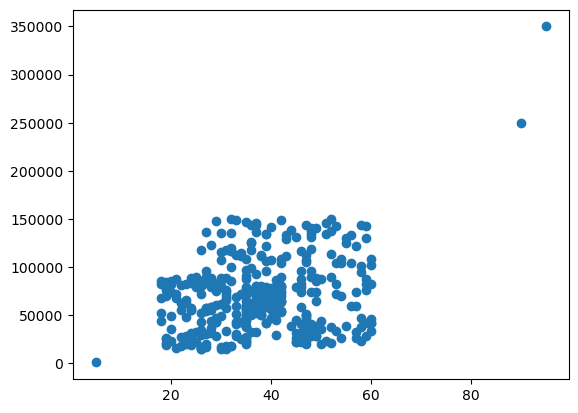

In [69]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 4), (121, 4))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [ ]:
# in the above case even after the standardization the outliers will behave as the outliers only